In [1]:
#Importaciones
import os
os.chdir(path)
from utiles import plot_img
from utiles import draw_history
from utiles import graficar_sets
from utiles import resize_scuare

In [2]:
# ------------------------------IMPORTACIÓN-------------------------------------
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# ---------------------------------main-----------------------------------------

# -Cargamos la MNIST de Keras, con ENTRENAMIENTO y TEST separado:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Calculamos la cantidad de etiquetas:
num_labels = len(np.unique(y_train))

# -Pasamos los vector de etiquetas con valores en [0,K-1] a vectores con 0s y 1s 
#  llamados one-hot-vectors, que son el tipo de vectores a usar en las capas de 
#  salidas de las redes usadas para clasificación:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# -Adecuación de datos:
# Hallamos el tamaño de las matrices:
image_size = x_train.shape[1]

# Pasamos las matrices a vectores y normalizamos en [0,1]:
print("shape x train inicial:", x_train.shape)
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
print("shape x train final:", x_train.shape)
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

shape x train inicial: (60000, 28, 28)
shape x train final: (60000, 28, 28, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

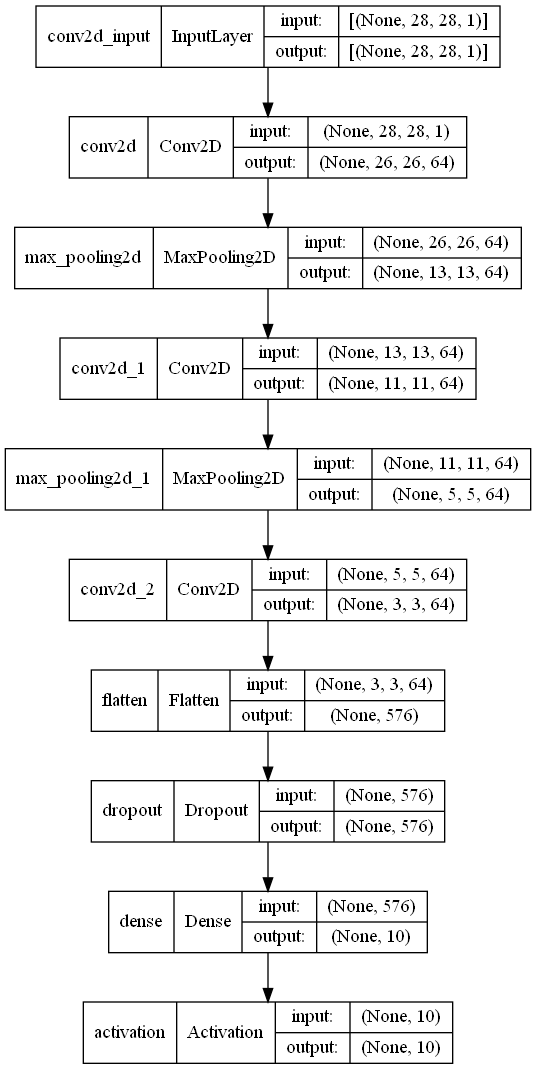

In [4]:
# -CNN:
# Parámetros:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(
    filters=filters,
    kernel_size=kernel_size,
    activation='relu',
    input_shape=input_shape)
)
model.add(
    MaxPooling2D(pool_size)
)
model.add(
    Conv2D(
        filters=filters,
        kernel_size=kernel_size,
        activation='relu'
    )
)
model.add(
    MaxPooling2D(
        pool_size
    )
)
model.add(
    Conv2D(
        filters=filters,        
        kernel_size=kernel_size,
        activation='relu'
    )
)
model.add(
    Flatten()
)
model.add(
    Dropout(dropout)
)
model.add(
    Dense(num_labels)
)
model.add(
    Activation('softmax')
)
model.summary()

plot_model(model)
plot_model(model, to_file='red00-00_base.png', show_shapes=True)


In [5]:
# -Entrenamiento CNN:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',    
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)



Epoch 1/10
329/329 [==============================] - 5s 8ms/step - loss: 0.3312 - accuracy: 0.9006 - val_loss: 0.0910 - val_accuracy: 0.9719
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0833 - accuracy: 0.9739 - val_loss: 0.0674 - val_accuracy: 0.9780
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0466 - val_accuracy: 0.9867
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0449 - val_accuracy: 0.9859
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 

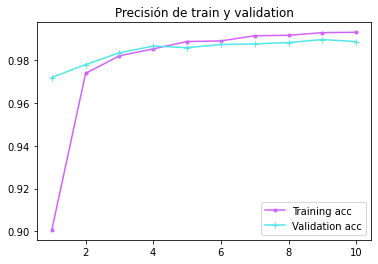

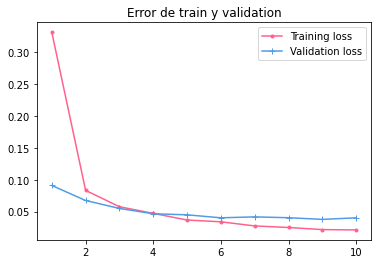

In [6]:
draw_history(history)        

In [7]:
# Evaluación de la RED:
_, acc = model.evaluate(
    x_test,
    y_test,
    batch_size=batch_size,
    verbose=0
)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.1%
